<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

F1 to Help Boost Singapore Tourism 2008 (Retrieved from https://www.dw.com/en/f1-to-help-boost-singapore-tourism/a-5213161)

S’pore’s tourist arrivals fell 85% to 2.7m, lowest in four decades due to Covid-19 2021 (Retreived from https://www.straitstimes.com/singapore/consumer/27-million-visitors-in-singapore-in-2020-lowest-in-four-decades-due-to-covid-19)

COVID-19’s Economic Impact on Tourism in Singapore 2021 (Retreived from https://www.iseas.edu.sg/wp-content/uploads/2021/07/ISEAS_Perspective_2021_108.pdf)


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:


def the_mean(values):
    return sum(values) / len(values)

values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
the_mean(values)

6.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def the_std_dev(values):
    n = len(values)
    mean = the_mean(values)
    var = (sum((x - mean)**2 for x in values)) / n
    std_dev = var ** 0.5
    return std_dev

values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
the_std_dev(values)

2.581988897471611

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import plotly.express as px
import functools as ft
import calendar
from scipy import stats

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [4]:
#upload rainfall data 
df_rainfall_monthly_total = pd.read_csv('../data/rainfall-monthly-total.csv')

In [5]:
df_rainfall_monthly_total.head()


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [6]:
df_rainfall_monthly_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [7]:
#upload rainfall monthly number of days
df_rainfall_monthly_number_rain_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')

In [8]:
df_rainfall_monthly_number_rain_days.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [9]:
df_rainfall_monthly_number_rain_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [10]:
#upload total_visitor_international_arrivals_monthly
df_total_visitor_international_arrivals_monthly = pd.read_csv('../data/total-visitor-international-arrivals-monthly.csv')

In [11]:
df_total_visitor_international_arrivals_monthly.head()

,month,total_international_visitor_arrivals
0,1978-01,167016
1,1978-02,147954
2,1978-03,163199
3,1978-04,162400
4,1978-05,162667


In [12]:
df_total_visitor_international_arrivals_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   month                                 455 non-null    object
 1   total_international_visitor_arrivals  455 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
#upload visitor-international-arrivals-to-singapore-by-country-monthly
df_international_by_country = pd.read_csv('../data/visitor-international-arrivals-to-singapore-by-country-monthly.csv')

In [14]:
df_international_by_country.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13694 entries, 0 to 13693
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   13694 non-null  object
 1   region                  13694 non-null  object
 2   country                 13694 non-null  object
 3   no_of_visitor_arrivals  13694 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 428.1+ KB


In [15]:
df_international_by_country.head()

,month,region,country,no_of_visitor_arrivals
0,1978-01,Asia,Asean,64500
1,1978-01,Asia,Japan,18652
2,1978-01,Asia,Hong Kong,3148
3,1978-01,Asia,"China, People's Republic Of",56
4,1978-01,Asia,Taiwan,1956


In [16]:
#identify which index number will represent the first data from 1996 Jan
df_international_by_country[df_international_by_country[ 'month']=='1996-01'].head()

,month,region,country,no_of_visitor_arrivals
5580,1996-01,Asia,Asean,159993
5581,1996-01,Asia,Brunei,4600
5582,1996-01,Asia,Indonesia,75854
5583,1996-01,Asia,Malaysia,47953
5584,1996-01,Asia,Philippines,10594


In [17]:
#remove data before 1996
df_international_by_country = df_international_by_country[5580:]

In [18]:
df_international_by_country.head()

,month,region,country,no_of_visitor_arrivals
5580,1996-01,Asia,Asean,159993
5581,1996-01,Asia,Brunei,4600
5582,1996-01,Asia,Indonesia,75854
5583,1996-01,Asia,Malaysia,47953
5584,1996-01,Asia,Philippines,10594


In [19]:
#remove country Asean as its a duplicate as countries like brunei,indonesia are already included
df_international_by_country_from1996 = df_international_by_country.loc[df_international_by_country['country']!='Asean']

In [20]:
#new dataframe for visitor-international-arrivals-to-singapore-by-country-monthly from 1996
df_international_by_country_from1996.head()

,month,region,country,no_of_visitor_arrivals
5581,1996-01,Asia,Brunei,4600
5582,1996-01,Asia,Indonesia,75854
5583,1996-01,Asia,Malaysia,47953
5584,1996-01,Asia,Philippines,10594
5585,1996-01,Asia,Thailand,16996


In [21]:
#merge monthly rain day with total visitor arrivals as final1
final1= pd.merge(df_rainfall_monthly_number_rain_days,df_total_visitor_international_arrivals_monthly,how = 'inner',on ='month')

In [22]:
#merge final1 with rainfall monthly total
final2= pd.merge(final1,df_rainfall_monthly_total,how = 'inner',on ='month')

In [23]:
#identify the index representing first data from 1996
final2[final2[ 'month']=='1996-01']

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
168,1996-01,10,599742,173.2


In [24]:
#remove data before 1996
final_from1996 = final2[168:]

In [25]:
final_from1996.head()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
168,1996-01,10,599742,173.2
169,1996-02,11,595491,180.2
170,1996-03,8,641447,129.7
171,1996-04,15,584109,178.2
172,1996-05,15,551828,107.5


In [26]:
final_from1996.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 168 to 406
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   month                                 239 non-null    object 
 1   no_of_rainy_days                      239 non-null    int64  
 2   total_international_visitor_arrivals  239 non-null    int64  
 3   total_rainfall                        239 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.3+ KB


In [27]:
#change month and year to datetime integer
final_from1996['year'] = pd.DatetimeIndex(final_from1996['month']).year
final_from1996['month'] = pd.DatetimeIndex(final_from1996['month']).month
final_from1996.head()

C:\Users\clair\AppData\Local\Temp\ipykernel_7524\3781661412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_from1996['year'] = pd.DatetimeIndex(final_from1996['month']).year
C:\Users\clair\AppData\Local\Temp\ipykernel_7524\3781661412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_from1996['month'] = pd.DatetimeIndex(final_from1996['month']).month


,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
168,1,10,599742,173.2,1996
169,2,11,595491,180.2,1996
170,3,8,641447,129.7,1996
171,4,15,584109,178.2,1996
172,5,15,551828,107.5,1996


In [28]:
final_from1996.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 168 to 406
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   month                                 239 non-null    int64  
 1   no_of_rainy_days                      239 non-null    int64  
 2   total_international_visitor_arrivals  239 non-null    int64  
 3   total_rainfall                        239 non-null    float64
 4   year                                  239 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 11.2 KB


In [29]:
#changing year and month to datetime integer
df_international_by_country_from1996['year'] = pd.DatetimeIndex(df_international_by_country_from1996['month']).year
df_international_by_country_from1996['month'] = pd.DatetimeIndex(df_international_by_country_from1996['month']).month
df_international_by_country_from1996.head()

C:\Users\clair\AppData\Local\Temp\ipykernel_7524\2960108671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_international_by_country_from1996['year'] = pd.DatetimeIndex(df_international_by_country_from1996['month']).year
C:\Users\clair\AppData\Local\Temp\ipykernel_7524\2960108671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_international_by_country_from1996['month'] = pd.DatetimeIndex(df_international_by_country_from1996['month']).month


,month,region,country,no_of_visitor_arrivals,year
5581,1,Asia,Brunei,4600,1996
5582,1,Asia,Indonesia,75854,1996
5583,1,Asia,Malaysia,47953,1996
5584,1,Asia,Philippines,10594,1996
5585,1,Asia,Thailand,16996,1996


In [30]:
df_international_by_country_from1996.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7875 entries, 5581 to 13693
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   7875 non-null   int64 
 1   region                  7875 non-null   object
 2   country                 7875 non-null   object
 3   no_of_visitor_arrivals  7875 non-null   int64 
 4   year                    7875 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 369.1+ KB


In [31]:
df_international_by_country_from1996.head()

,month,region,country,no_of_visitor_arrivals,year
5581,1,Asia,Brunei,4600,1996
5582,1,Asia,Indonesia,75854,1996
5583,1,Asia,Malaysia,47953,1996
5584,1,Asia,Philippines,10594,1996
5585,1,Asia,Thailand,16996,1996


In [32]:
final_from1996

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
168,1,10,599742,173.2,1996
169,2,11,595491,180.2,1996
170,3,8,641447,129.7,1996
171,4,15,584109,178.2,1996
172,5,15,551828,107.5,1996
...,...,...,...,...,...
402,7,13,1519188,116.8,2015
403,8,11,1445052,185.8,2015
404,9,8,1131967,61.6,2015
405,10,9,1246706,87.2,2015


In [33]:
final_from1996.to_csv('../data/final_from1996.csv',index=False)

In [34]:
df_international_by_country_from1996.to_csv('../data/df_international_by_country_from1996.csv',index=False)

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**total_rainfall**|*float*|rainfall-monthly-total|Total rainfall in mm| 
|**no_of_rainy_days**|*float*|rainfall-monthly-number-of-rain-days|number of rainy days per month| 
|**total_international_visitor_arrivals**|*float*|total-visitor-international-arrivals-monthly|total international visitors arrivals per month|
|**region**|*integer*|visitor-international-arrivals-to-singapore-by-country-monthly|which continent the coutry belongs to|
|**country**|*integer*|visitor-international-arrivals-to-singapore-by-country-monthly|this includes the name of each country and also the group ASEAN is inside as well|
|**no_of_visitor_arrivals**|*float*|visitor-international-arrivals-to-singapore-by-country-monthly|total visitors arrivals based ont he country in the row per month|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [35]:
final_from1996.describe()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
count,239.000000,239.000000,2.390000e+02,239.000000,239.000000
mean,6.476987,14.213389,8.262431e+05,182.221757,2005.460251
std,3.448068,4.903316,2.674645e+05,114.244928,5.757484
min,1.000000,1.000000,1.778080e+05,0.200000,1996.000000
25%,3.500000,11.000000,6.111115e+05,104.700000,2000.500000
50%,6.000000,14.000000,7.526140e+05,162.300000,2005.000000
75%,9.000000,18.000000,1.012343e+06,240.750000,2010.000000
max,12.000000,24.000000,1.519188e+06,765.900000,2015.000000


In [36]:
final_from1996.groupby('month').mean().T

month,1,2,3,4,5,6,7,8,9,10,11,12
no_of_rainy_days,13.25,8.15,13.15,15.000,14.350,12.60,13.950,14.45,13.05,15.35,18.500,19.000000
total_international_visitor_arrivals,822569.00,774500.90,838607.05,792241.500,780555.700,794301.00,926237.450,899017.30,767485.40,822596.20,806123.600,894073.210526
total_rainfall,254.65,102.65,170.78,161.665,169.245,129.27,152.955,164.08,143.17,180.57,242.925,321.673684
year,2005.50,2005.50,2005.50,2005.500,2005.500,2005.50,2005.500,2005.50,2005.50,2005.50,2005.500,2005.000000


In [37]:
sd = {col.name:the_std_dev(col) for col in [final_from1996[i] for i in final_from1996.columns if (final_from1996[i].dtype=='float64') or (final_from1996[i].dtype=='int64')]}

In [38]:
sd

{'month': 3.440847073241181,
 'no_of_rainy_days': 4.893047392130898,
 'total_international_visitor_arrivals': 266904.3899200262,
 'total_rainfall': 114.00567127605657,
 'year': 5.745426554818065}

In [39]:
final_from1996.tail()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
402,7,13,1519188,116.8,2015
403,8,11,1445052,185.8,2015
404,9,8,1131967,61.6,2015
405,10,9,1246706,87.2,2015
406,11,13,1193906,72.6,2015


In [40]:
df =final_from1996.groupby(['year','month']).mean()

<span style='color:Blue'> **Q. Which month have the highest and lowest total rainfall in 1996, 2000, 2010 and 2015?**</span>

In [41]:
df.xs(key=1996,axis=0,level='year').nlargest(1,'total_rainfall',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
10,19.0,600917.0,300.0


<span style='color:Blue'> October has the highest total rainfall month in 1996.</span>

In [42]:
df.xs(key=2000,axis=0,level='year').nlargest(1,'total_rainfall',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
11,21.0,625618.0,385.7


<span style='color:Blue'> November has the highest total rainfall month in 2000.</span>

In [43]:
df.xs(key=2010,axis=0,level='year').nlargest(1,'total_rainfall',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
7,18.0,1095047.0,298.5


<span style='color:Blue'> July has the highest total rainfall month in 2010.</span>

In [44]:
df.xs(key=2015,axis=0,level='year').nlargest(1,'total_rainfall',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
8,11.0,1445052.0,185.8


<span style='color:Blue'> August has the highest total rainfall month in 2015.</span>

In [45]:
import datetime

In [46]:
#Which month have the highest and lowest total rainfall in 1996, 2000, 2010 and 2015?
indexmonth_final_from1996 = final_from1996.set_index('month')
print('1996 highest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==1996].idxmax()['total_rainfall']), 1).strftime("%B")))
print('2000 highest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2000].idxmax()['total_rainfall']), 1).strftime("%B")))
print('2010 highest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2010].idxmax()['total_rainfall']), 1).strftime("%B")))
print('2015 highest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2015].idxmax()['total_rainfall']), 1).strftime("%B")))

1996 highest total rainfall month is October
2000 highest total rainfall month is November
2010 highest total rainfall month is July
2015 highest total rainfall month is August


In [47]:
print('1996 lowest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==1996].idxmin()['total_rainfall']), 1).strftime("%B")))
print('2000 lowest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2000].idxmin()['total_rainfall']), 1).strftime("%B")))
print('2010 lowest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2010].idxmin()['total_rainfall']), 1).strftime("%B")))
print('2015 lowest total rainfall month is {}'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2015].idxmin()['total_rainfall']), 1).strftime("%B")))

1996 lowest total rainfall month is May
2000 lowest total rainfall month is September
2010 lowest total rainfall month is February
2015 lowest total rainfall month is February


In [48]:
final_from1996.groupby('year').sum()['total_rainfall'].sort_values(ascending=False)

year
2007    2886.2
2001    2783.1
2006    2753.2
2013    2748.4
1998    2623.1
2011    2524.2
1996    2418.0
2003    2391.2
2000    2370.5
2008    2325.1
2012    2159.9
2004    2136.4
1999    2134.0
2010    2075.1
2005    1930.7
2009    1920.9
2002    1748.9
2014    1538.4
1997    1118.9
2015     964.8
Name: total_rainfall, dtype: float64

<span style='color:Blue'> **Which year have the highest and lowest total rainfall in the date range of analysis?**</span>

In [49]:


print(final_from1996.groupby('year').sum()['total_rainfall'].idxmax() ,'has the highest total rainfall in the date range of analysis')
print(final_from1996.groupby('year').sum()['total_rainfall'].idxmin() ,'has the lowest total rainfall in the date range of analysis')

2007 has the highest total rainfall in the date range of analysis
2015 has the lowest total rainfall in the date range of analysis


<span style='color:Blue'> **Q Which month have the highest and lowest number of rainy days in 1996, 2000, 2010 and 2015?**</span>

In [50]:
df.xs(key=1996,axis=0,level='year').nlargest(1,'no_of_rainy_days',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
10,19.0,600917.0,300.0


<span style='color:Blue'> July has the highest no of rainy days in 1996.</span>

In [51]:
df.xs(key=2000,axis=0,level='year').nlargest(1,'no_of_rainy_days',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
11,21.0,625618.0,385.7


<span style='color:Blue'> November has the highest no of rainy days in 2000.</span>

In [52]:
df.xs(key=2010,axis=0,level='year').nlargest(1,'no_of_rainy_days',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
11,21.0,964170.0,278.8


<span style='color:Blue'> November has the highest no of rainy days in 2010.</span>

In [53]:
df.xs(key=2015,axis=0,level='year').nlargest(1,'no_of_rainy_days',keep='all')

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
month,,,
4,13.0,1208621.0,73.2
7,13.0,1519188.0,116.8
11,13.0,1193906.0,72.6


<span style='color:Blue'> April, July and November has the highest no of rainy days in 2015.</span>

In [54]:
#cannot use this as idxmax only take in the first value and not all value due to 2015
#print('{} has the highest number of rainy days in 1996'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==1996].idxmax()['no_of_rainy_days']), 1).strftime("%B")))
#print('{} has the highest number of rainy days in 2000'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2000].idxmax()['no_of_rainy_days']), 1).strftime("%B")))
#print('{} has the highest number of rainy days in 2010'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2010].idxmax()['no_of_rainy_days']), 1).strftime("%B")))
#print('{} has the highest number of rainy days in 2015'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2015].idxmax()['no_of_rainy_days']), 1).strftime("%B")))


In [55]:
print('{} has the lowest number of rainy days in 1996'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==1996].idxmin()['no_of_rainy_days']), 1).strftime("%B")))
print('{} has the lowest number of rainy days in 2000'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2000].idxmin()['no_of_rainy_days']), 1).strftime("%B")))
print('{} has the lowest number of rainy days in 2010'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2010].idxmin()['no_of_rainy_days']), 1).strftime("%B")))
print('{} has the lowest number of rainy days in 2015'.format(datetime.datetime(1, int(indexmonth_final_from1996[indexmonth_final_from1996['year']==2015].idxmin()['no_of_rainy_days']), 1).strftime("%B")))


March has the lowest number of rainy days in 1996
May has the lowest number of rainy days in 2000
February has the lowest number of rainy days in 2010
March has the lowest number of rainy days in 2015


In [56]:
final_from1996.groupby('year').sum()['no_of_rainy_days'].sort_values(ascending=False)

year
2013    206
2007    195
2012    191
2000    188
2011    188
2003    186
2001    184
2008    182
2010    178
1998    177
1999    177
2005    175
2006    174
1996    170
2009    166
2014    152
2004    147
2002    139
1997    116
2015    106
Name: no_of_rainy_days, dtype: int64

<span style='color:Blue'> **Which year have the highest and lowest number of rainy days in the date range of analysis?**</span>

In [57]:
print(final_from1996.groupby('year').sum()['no_of_rainy_days'].idxmax() ,'has the highest no_of_rainy_days in the date range of analysis')
print(final_from1996.groupby('year').sum()['no_of_rainy_days'].idxmin() ,'has the lowest no_of_rainy_days in the date range of analysis')

2013 has the highest no_of_rainy_days in the date range of analysis
2015 has the lowest no_of_rainy_days in the date range of analysis


<span style='color:Blue'> **Are there any outliers months in the dataset?**</span>

In [58]:
final_from1996

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
168,1,10,599742,173.2,1996
169,2,11,595491,180.2,1996
170,3,8,641447,129.7,1996
171,4,15,584109,178.2,1996
172,5,15,551828,107.5,1996
...,...,...,...,...,...
402,7,13,1519188,116.8,2015
403,8,11,1445052,185.8,2015
404,9,8,1131967,61.6,2015
405,10,9,1246706,87.2,2015


In [59]:
final_from1996.describe()[['no_of_rainy_days','total_international_visitor_arrivals','total_rainfall']]

,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall
count,239.000000,2.390000e+02,239.000000
mean,14.213389,8.262431e+05,182.221757
std,4.903316,2.674645e+05,114.244928
min,1.000000,1.778080e+05,0.200000
25%,11.000000,6.111115e+05,104.700000
50%,14.000000,7.526140e+05,162.300000
75%,18.000000,1.012343e+06,240.750000
max,24.000000,1.519188e+06,765.900000


<span style='color:Blue'>there seems be to outliner in total rainfall as the max(765) is more than times the mean(182)</span>

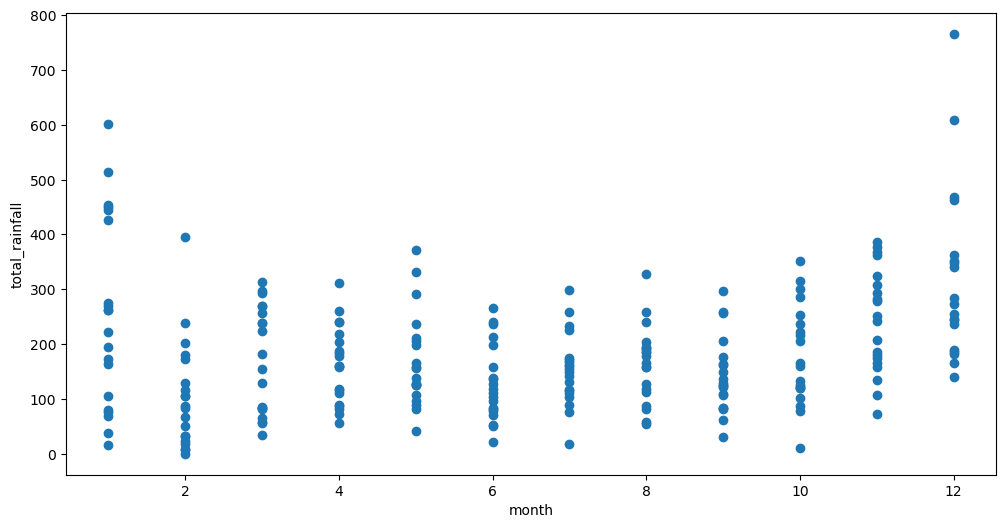

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(final_from1996['month'], final_from1996['total_rainfall'])
ax.set_xlabel('month')
ax.set_ylabel('total_rainfall')
plt.show()

Seems like Jan and Dec are months with likely more outliners

In [61]:
def find_outliers_IQR(final_from1996):
        q1=final_from1996.quantile(0.25)
        q3=final_from1996.quantile(0.75)
        IQR=q3-q1
        outliers = final_from1996[((final_from1996<(q1-1.5*IQR)) | (final_from1996>(q3+1.5*IQR)))]
        return outliers

In [62]:
outliers = find_outliers_IQR(final_from1996['total_rainfall'])

In [63]:
print('number of outliers: '+ str(len(outliers)))

number of outliers: 8


In [64]:
print('number of outliers: '+ str(outliers.max()))

number of outliers: 765.9


In [65]:
print('number of outliers: '+ str(outliers.min()))

number of outliers: 450.1


In [66]:
outliers

203    463.4
239    609.0
264    600.9
288    454.4
299    765.9
300    450.1
311    468.6
348    513.2
Name: total_rainfall, dtype: float64

In [67]:
final_from1996.loc[[203,239,264,288,299,300,311,348]].sort_values(by =['year','month'] , ascending=False)

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
348,1,17,1055990,513.2,2011
311,12,20,953812,468.6,2007
300,1,20,825919,450.1,2007
299,12,22,903512,765.9,2006
288,1,20,767908,454.4,2006
264,1,13,651951,600.9,2004
239,12,20,670277,609.0,2001
203,12,22,572910,463.4,1998


<span style='color:Blue'>The outliners months for total rainfall are as follows: Dec1998, Dec2001, Jan2004, Jan2006, Dec2006, Jan2007, Dec2007, Jan2011 </span>

In [68]:
#identify the top five visitor arrival country
df_international_by_country_from1996.groupby('country')[['no_of_visitor_arrivals']].sum().reset_index().sort_values(by='no_of_visitor_arrivals',ascending=False,ignore_index=True).head(5)

,country,no_of_visitor_arrivals
0,Indonesia,37030661
1,"China, People's Republic Of",19914764
2,Malaysia,15314590
3,Japan,14572367
4,Australia,13951574


In [69]:
final_from1996.head()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
168,1,10,599742,173.2,1996
169,2,11,595491,180.2,1996
170,3,8,641447,129.7,1996
171,4,15,584109,178.2,1996
172,5,15,551828,107.5,1996


In [70]:
final_from1996.describe()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year
count,239.000000,239.000000,2.390000e+02,239.000000,239.000000
mean,6.476987,14.213389,8.262431e+05,182.221757,2005.460251
std,3.448068,4.903316,2.674645e+05,114.244928,5.757484
min,1.000000,1.000000,1.778080e+05,0.200000,1996.000000
25%,3.500000,11.000000,6.111115e+05,104.700000,2000.500000
50%,6.000000,14.000000,7.526140e+05,162.300000,2005.000000
75%,9.000000,18.000000,1.012343e+06,240.750000,2010.000000
max,12.000000,24.000000,1.519188e+06,765.900000,2015.000000


In [71]:
#if we identify any month with more than 11 rainy days to be considered as a rainy month
final_from1996['rainy_month']= final_from1996['no_of_rainy_days']>=11

C:\Users\clair\AppData\Local\Temp\ipykernel_7524\1384111494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_from1996['rainy_month']= final_from1996['no_of_rainy_days']>=11


In [72]:
final_from1996.head()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year,rainy_month
168,1,10,599742,173.2,1996,False
169,2,11,595491,180.2,1996,True
170,3,8,641447,129.7,1996,False
171,4,15,584109,178.2,1996,True
172,5,15,551828,107.5,1996,True


In [73]:
#one hot encode 
my_map = {'True':'1', 'False':'0'}

In [74]:
final_from1996['rainy_month'].map(my_map)

168    NaN
169    NaN
170    NaN
171    NaN
172    NaN
      ... 
402    NaN
403    NaN
404    NaN
405    NaN
406    NaN
Name: rainy_month, Length: 239, dtype: object

In [75]:
#number of rainy months
final_from1996['rainy_month'].value_counts()

True     186
False     53
Name: rainy_month, dtype: int64

In [76]:
final_from1996 = final_from1996.astype({'rainy_month':int})
final_from1996.head()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year,rainy_month
168,1,10,599742,173.2,1996,0
169,2,11,595491,180.2,1996,1
170,3,8,641447,129.7,1996,0
171,4,15,584109,178.2,1996,1
172,5,15,551828,107.5,1996,1


In [77]:
#group df_international_by_country_from1996 under montha and country
df3 = df_international_by_country_from1996.groupby(['month','country']).sum().reset_index()

In [78]:
#drop year
df3 = df3.drop(axis=1,columns = 'year')

In [79]:
df3

,month,country,no_of_visitor_arrivals
0,1,Australia,1381066
1,1,Austria,33393
2,1,Belgium-luxembourg,34054
3,1,Brunei,88615
4,1,CIS & Eastern Europe,249002
...,...,...,...
391,12,Thailand,531289
392,12,USA,633800
393,12,United Arab Emirates,63592
394,12,United Kingdom,727175


In [80]:
df3[df3['country']=='Japan']

,month,country,no_of_visitor_arrivals
14,1,Japan,1174628
47,2,Japan,1181482
80,3,Japan,1474877
113,4,Japan,949176
146,5,Japan,978526
179,6,Japan,1046815
212,7,Japan,1288347
245,8,Japan,1577927
278,9,Japan,1372964
311,10,Japan,1144075


In [81]:
df4 = final_from1996.groupby(['month']).sum().reset_index()

In [82]:
df4

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year,rainy_month
0,1,265,16451380,5093.0,40110,13
1,2,163,15490018,2053.0,40110,6
2,3,263,16772141,3415.6,40110,12
3,4,300,15844830,3233.3,40110,18
4,5,287,15611114,3384.9,40110,18
5,6,252,15886020,2585.4,40110,16
6,7,279,18524749,3059.1,40110,16
7,8,289,17980346,3281.6,40110,18
8,9,261,15349708,2863.4,40110,15
9,10,307,16451924,3611.4,40110,15


In [83]:
df5 = pd.merge(df3,df4,how = 'inner',on ='month')

In [84]:
df5 =df5.drop(axis=1,columns = ['total_international_visitor_arrivals','year'])

In [85]:
df5

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
0,1,Australia,1381066,265,5093.0,13
1,1,Austria,33393,265,5093.0,13
2,1,Belgium-luxembourg,34054,265,5093.0,13
3,1,Brunei,88615,265,5093.0,13
4,1,CIS & Eastern Europe,249002,265,5093.0,13
...,...,...,...,...,...,...
391,12,Thailand,531289,361,6111.8,19
392,12,USA,633800,361,6111.8,19
393,12,United Arab Emirates,63592,361,6111.8,19
394,12,United Kingdom,727175,361,6111.8,19


In [86]:
df6 = df5[(df5['country'] == 'Australia')|(df5['country'] == 'Japan')|(df5['country'] =='Indonesia')|(df5['country'] =="China, People's Republic Of")|(df5['country'] =="Malaysia")]

In [87]:
df6.head()

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
0,1,Australia,1381066,265,5093.0,13
6,1,"China, People's Republic Of",1755845,265,5093.0,13
12,1,Indonesia,3110021,265,5093.0,13
14,1,Japan,1174628,265,5093.0,13
17,1,Malaysia,1107470,265,5093.0,13


In [88]:
df_Australia = df6[(df6['country'] == 'Australia')]
df_Australia.head()

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
0,1,Australia,1381066,265,5093.0,13
33,2,Australia,878913,163,2053.0,6
66,3,Australia,1021886,263,3415.6,12
99,4,Australia,1121699,300,3233.3,18
132,5,Australia,1034639,287,3384.9,18


In [89]:
df_Indonesia = df6[(df6['country'] == "Indonesia")]
df_Indonesia.head()

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
12,1,Indonesia,3110021,265,5093.0,13
45,2,Indonesia,2575970,163,2053.0,6
78,3,Indonesia,2906441,263,3415.6,12
111,4,Indonesia,2667182,300,3233.3,18
144,5,Indonesia,2950284,287,3384.9,18


In [90]:
df_China = df6[(df6['country'] == "China, People's Republic Of")]
df_China.head()

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
6,1,"China, People's Republic Of",1755845,265,5093.0,13
39,2,"China, People's Republic Of",2030170,163,2053.0,6
72,3,"China, People's Republic Of",1615392,263,3415.6,12
105,4,"China, People's Republic Of",1689094,300,3233.3,18
138,5,"China, People's Republic Of",1440000,287,3384.9,18


In [91]:
df_Japan = df6[(df6['country'] == "Japan")]
df_Japan.head()

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
14,1,Japan,1174628,265,5093.0,13
47,2,Japan,1181482,163,2053.0,6
80,3,Japan,1474877,263,3415.6,12
113,4,Japan,949176,300,3233.3,18
146,5,Japan,978526,287,3384.9,18


In [92]:
df_Malaysia = df6[(df6['country'] == "Malaysia")]
df_Malaysia.head()

,month,country,no_of_visitor_arrivals,no_of_rainy_days,total_rainfall,rainy_month
17,1,Malaysia,1107470,265,5093.0,13
50,2,Malaysia,1136536,163,2053.0,6
83,3,Malaysia,1284572,263,3415.6,12
116,4,Malaysia,1196659,300,3233.3,18
149,5,Malaysia,1273302,287,3384.9,18


In [93]:
# group months into into monsoon seasons

def monsoon_status(df6):
    if df6['month'] == 12 or df6['month'] == 1 or df6['month'] == 2:
        return 'Northeast Monsoon (Dec-Feb)'
    elif df6['month'] == 6 or df6['month'] == 7 or df6['month'] == 8 or df6['month']== 9:
        return 'Southwest Monsoon (Jun-Sept)'
    elif df6['month'] == 10 or df6['month'] == 11:
        return 'Inter-monsoon (Oct - Nov)'
    else:
        return 'Inter-monsoon (Mar-May)'

df6['season'] = df6.apply(monsoon_status, axis = 1)

C:\Users\clair\AppData\Local\Temp\ipykernel_7524\1180089110.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['season'] = df6.apply(monsoon_status, axis = 1)


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


In [95]:
final_from1996.corr()

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year,rainy_month
month,1.000000,0.400281,0.058558,0.203435,-0.011105,0.302314
no_of_rainy_days,0.400281,1.000000,0.078963,0.707260,0.040263,0.749889
total_international_visitor_arrivals,0.058558,0.078963,1.000000,-0.011314,0.887021,-0.006970
total_rainfall,0.203435,0.707260,-0.011314,1.000000,-0.049623,0.488249
year,-0.011105,0.040263,0.887021,-0.049623,1.000000,-0.015088
rainy_month,0.302314,0.749889,-0.006970,0.488249,-0.015088,1.000000


Text(0.5, 0, 'Month')

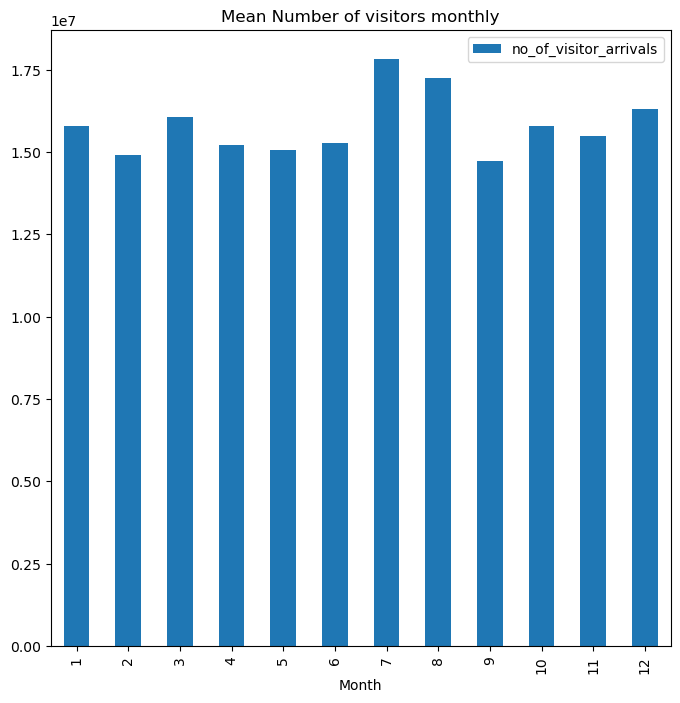

In [96]:
df_international_by_country_from1996.groupby(['month'])[['no_of_visitor_arrivals']].sum().reset_index().plot(kind='bar',x='month',y='no_of_visitor_arrivals',figsize=(8,8))
plt.title('Mean Number of visitors monthly')
plt.xlabel("Month")

Text(0.5, 0, 'Month')

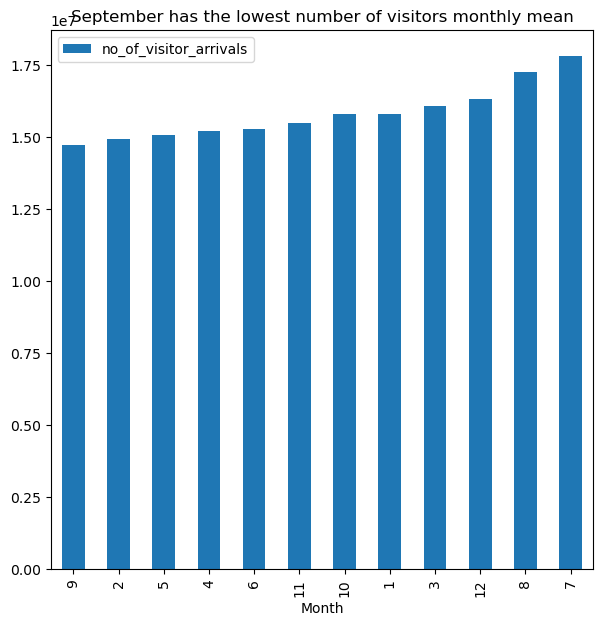

In [97]:
df_international_by_country_from1996.groupby(['month'])[['no_of_visitor_arrivals']].sum().reset_index().sort_values(by='no_of_visitor_arrivals',ignore_index=True)\
        .plot(kind='bar',x='month',y='no_of_visitor_arrivals',figsize=(7,7))
plt.title('September has the lowest number of visitors monthly mean')
plt.xlabel("Month")

Text(0.5, 0, 'Month')

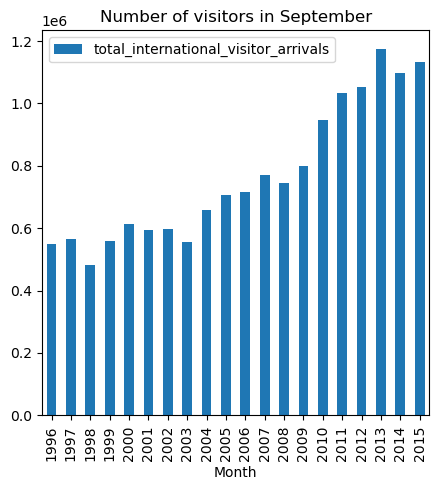

In [98]:
final_from1996[final_from1996['month']==9].plot(kind='bar',x='year',y='total_international_visitor_arrivals',figsize=(5,5))
plt.title('Number of visitors in September')
plt.xlabel("Month")

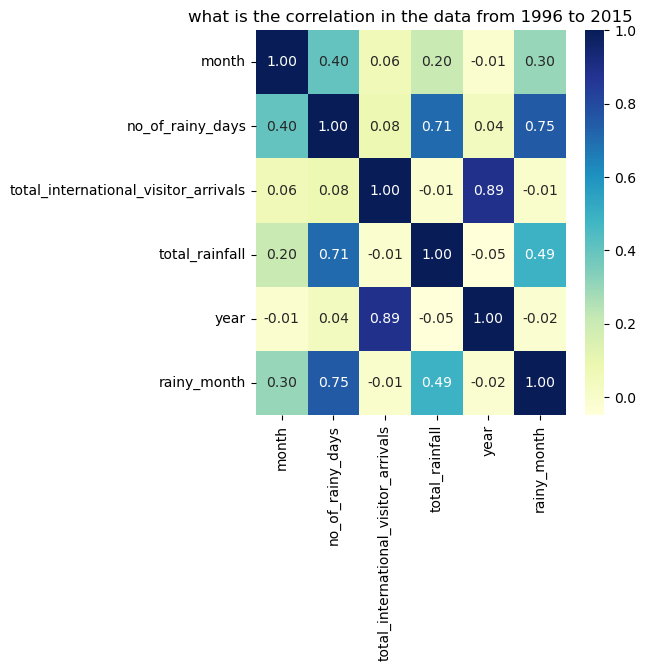

In [100]:
plt.subplots(figsize=(5, 5))
sns.heatmap(final_from1996 .corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title('what is the correlation in the data from 1996 to 2015')
plt.show()

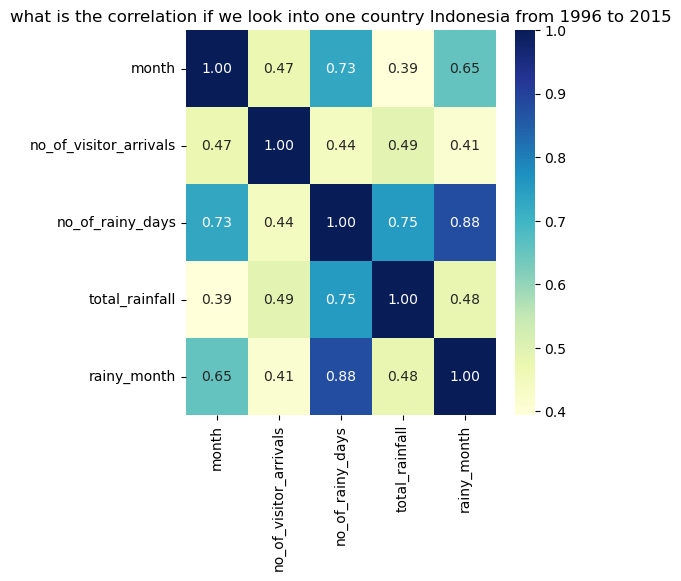

In [101]:

plt.subplots(figsize=(5, 5))
sns.heatmap(df_Indonesia .corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title('what is the correlation if we look into one country Indonesia from 1996 to 2015')
plt.show()

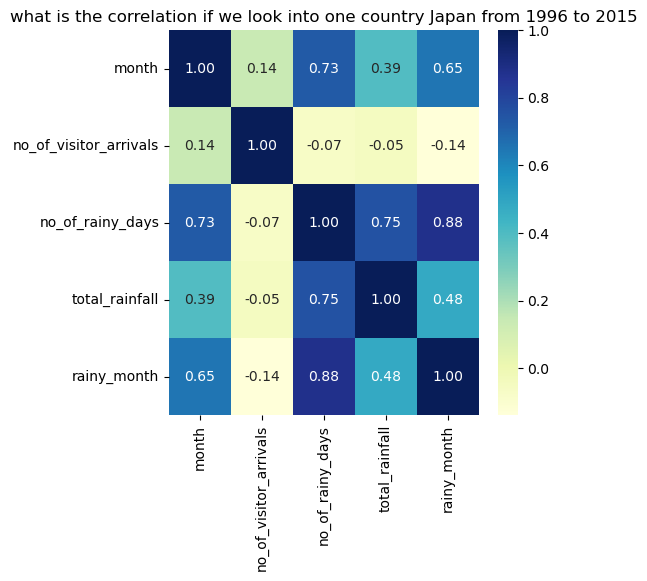

In [102]:
plt.subplots(figsize=(5, 5))
sns.heatmap(df_Japan .corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title('what is the correlation if we look into one country Japan from 1996 to 2015')
plt.show()

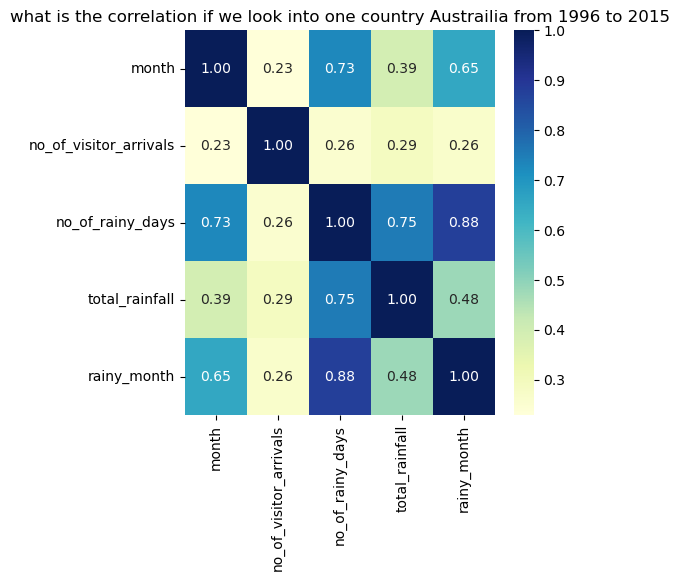

In [103]:
plt.subplots(figsize=(5, 5))
sns.heatmap(df_Australia .corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title('what is the correlation if we look into one country Austrailia from 1996 to 2015')
plt.show()

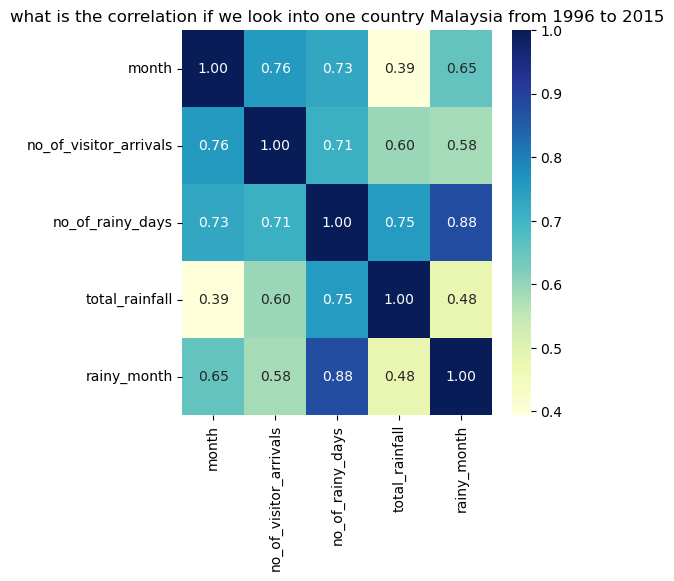

In [104]:
plt.subplots(figsize=(5, 5))
sns.heatmap(df_Malaysia .corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title('what is the correlation if we look into one country Malaysia from 1996 to 2015')
plt.show()

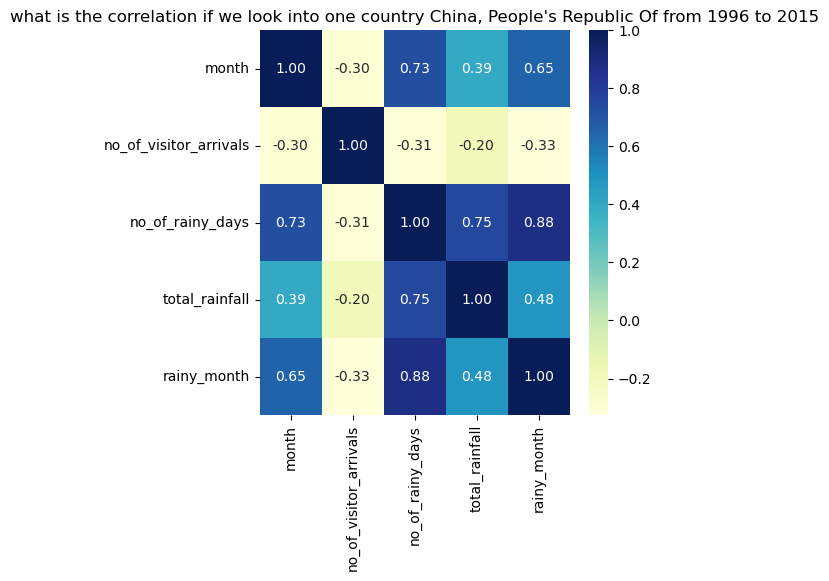

In [105]:
plt.subplots(figsize=(5, 5))
sns.heatmap(df_China .corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title("what is the correlation if we look into one country China, People's Republic Of from 1996 to 2015")
plt.show()

Text(0.5, 1.0, 'Comparing Number of rainy days with Total rainfall')

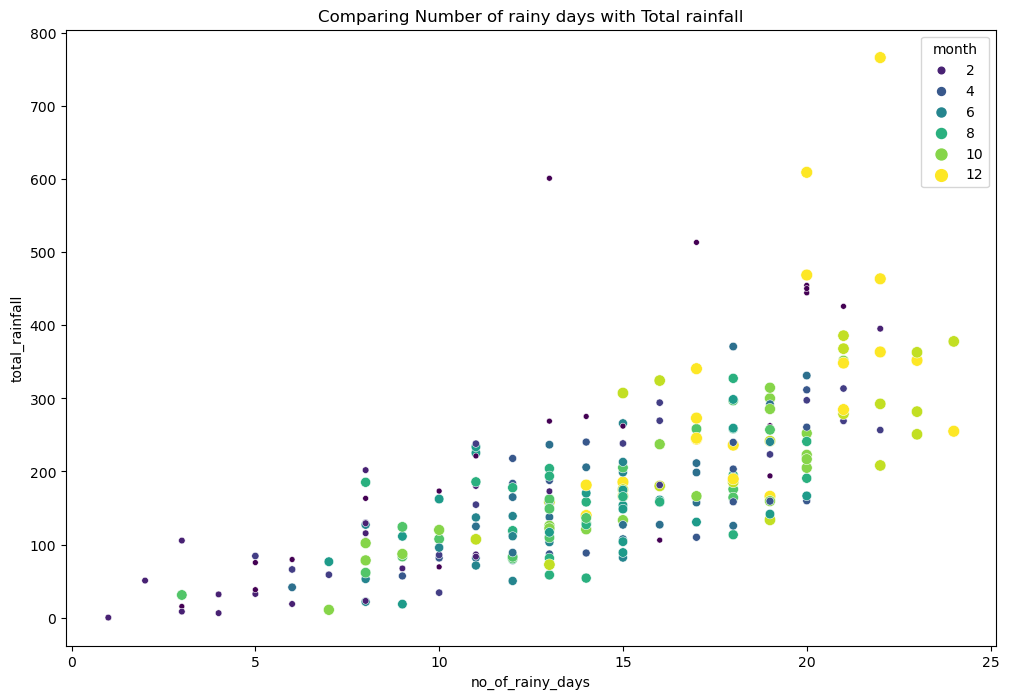

In [106]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='no_of_rainy_days',y='total_rainfall',data=final_from1996, hue='month',palette='viridis',size ='month')
plt.title('Comparing Number of rainy days with Total rainfall')

In [107]:
stats.pearsonr(final_from1996['no_of_rainy_days'], final_from1996['total_rainfall'])

(0.7072596045119901, 1.4737534118420401e-37)

<span style='color:Blue'>*Interpretation: Comparing no of rainy days with total rain fall, it seems like the lesser the no of rainy days the leser total rainfall. When the month has more number of rainy days, its range of rainfall is more wide in terms of total rainfall* </span>

In [108]:
final_from1996

,month,no_of_rainy_days,total_international_visitor_arrivals,total_rainfall,year,rainy_month
168,1,10,599742,173.2,1996,0
169,2,11,595491,180.2,1996,1
170,3,8,641447,129.7,1996,0
171,4,15,584109,178.2,1996,1
172,5,15,551828,107.5,1996,1
...,...,...,...,...,...,...
402,7,13,1519188,116.8,2015,1
403,8,11,1445052,185.8,2015,1
404,9,8,1131967,61.6,2015,0
405,10,9,1246706,87.2,2015,0


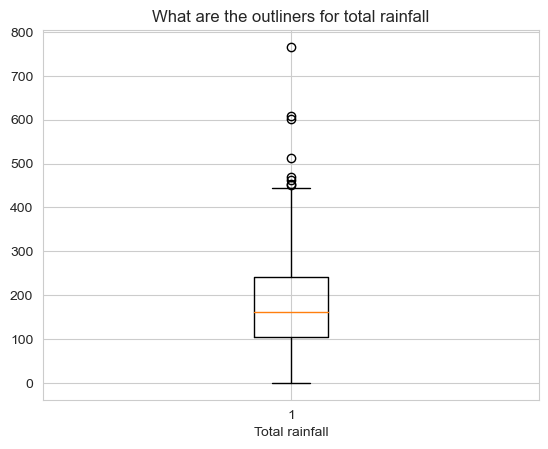

In [109]:
sns.set_style('whitegrid')
plt.boxplot(final_from1996['total_rainfall'])
plt.title('What are the outliners for total rainfall')
plt.xlabel("Total rainfall")
plt.show()

<span style='color:Blue'>*Interpretation: the median total rainfall is around 162 with Q1 at 104 and Q3 at 240. The outliners for total rainfall should be around 450 and above and reaching near 465 rainfall a month* </span>

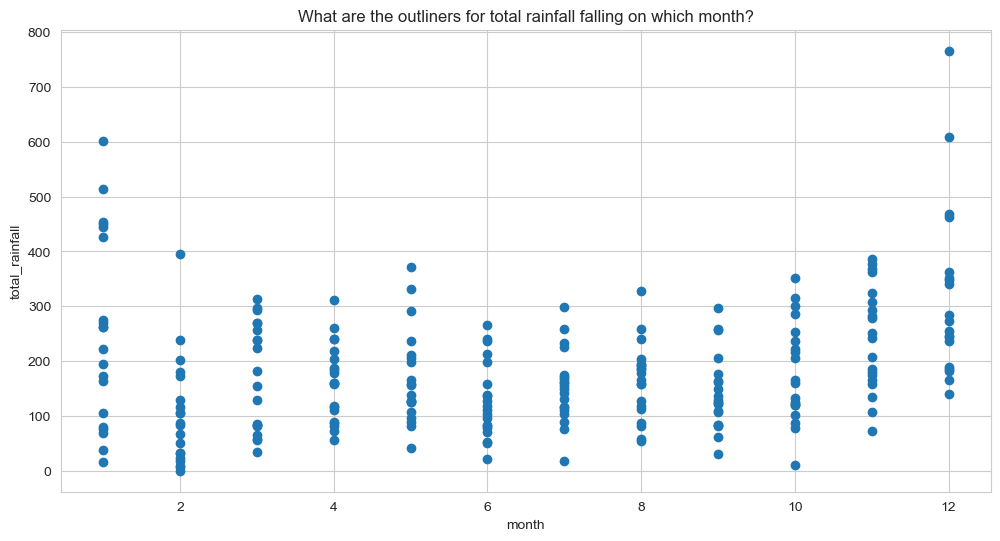

In [110]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(final_from1996['month'], final_from1996['total_rainfall'])
ax.set_xlabel('month')
ax.set_ylabel('total_rainfall')
plt.title('What are the outliners for total rainfall falling on which month?')
plt.show()

<span style='color:Blue'>Interpretation: These outliners mostly are not human error but due to changes in weather patterns as such we will keep these outliners since outliners of heavy rainfall falls in December and January as it usually colder in these months at 26.0ºC (http://www.weather.gov.sg/climate-climate-of-singapore/ </span>

<Figure size 800x800 with 0 Axes>

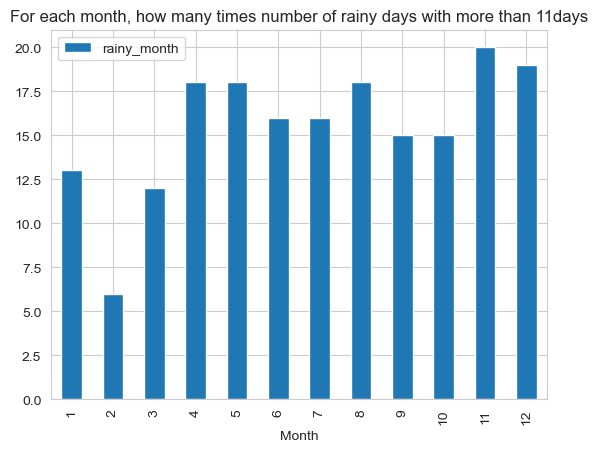

In [124]:
plt.figure(figsize=(8,8))
(final_from1996.groupby(['month']).sum().plot.bar(y = 'rainy_month') )
plt.title('For each month, how many times number of rainy days with more than 11days')
plt.xlabel("Month")
plt.show()

Text(0.5, 0, 'Month')

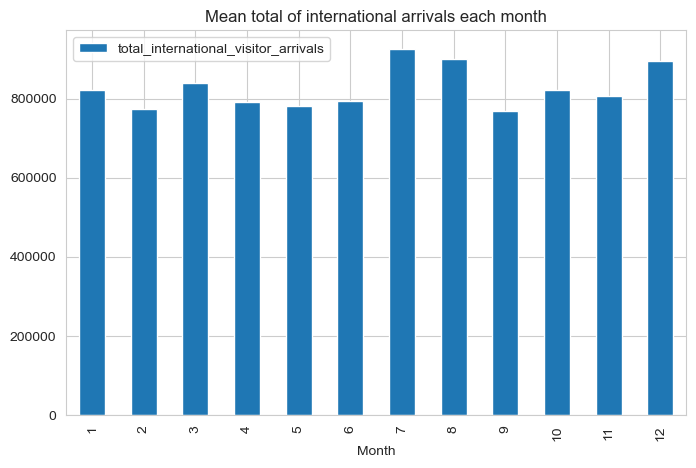

In [123]:
final_from1996.groupby([ 'month']).mean()[['total_international_visitor_arrivals']].plot(kind='bar',figsize=(8,5))
plt.title('Mean total of international arrivals each month')
plt.xlabel("Month")

<span style='color:Blue'>*Interpretation: Comparing the graph 'Mean total of international arrivals each month' with graph 'For each month, how many times number of rainy days with more than 11days', its seems that the visitors are not affected by the rainy day patterns in Singapore when making their decision to travel. And from the correlation with rainy month and internation arrivals is only 3%* The top three months for tourist arrivals are July August and Decemeber</span>

Text(0.5, 0, 'month')

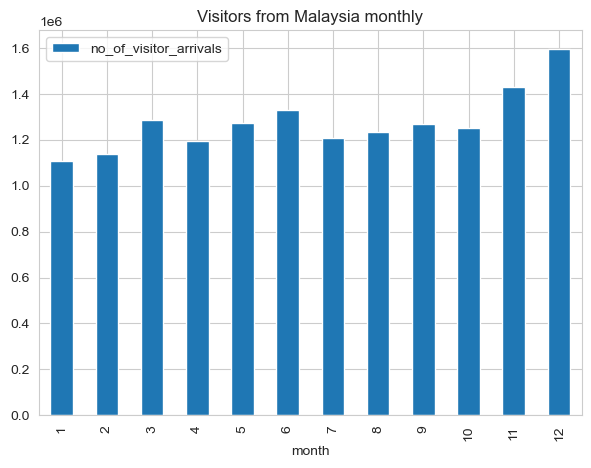

In [113]:
df_Malaysia.groupby('month').sum().plot(kind='bar',y='no_of_visitor_arrivals',figsize=(7,5))
plt.title("Visitors from Malaysia monthly")
plt.xlabel("month")

Text(0.5, 0, 'month')

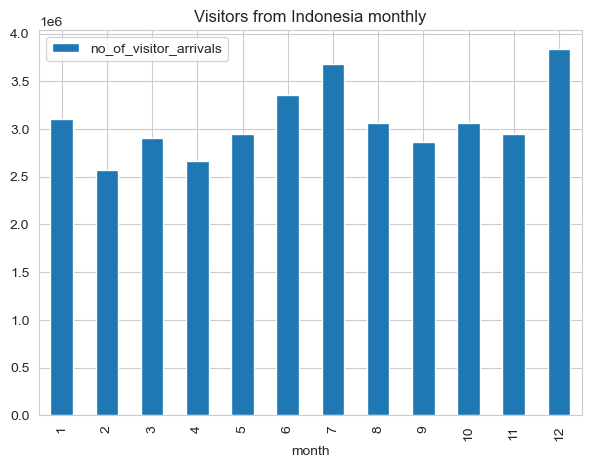

In [114]:
df_Indonesia.groupby('month').sum().plot(kind='bar',y='no_of_visitor_arrivals',figsize=(7,5))
plt.title("Visitors from Indonesia monthly")
plt.xlabel("month")

In [115]:
dfchina = df_international_by_country_from1996[df_international_by_country_from1996['country']=="China, People's Republic Of"]

In [116]:
dfchina.head(12)

,month,region,country,no_of_visitor_arrivals,year
5589,1,Asia,"China, People's Republic Of",19510,1996
5622,2,Asia,"China, People's Republic Of",18351,1996
5655,3,Asia,"China, People's Republic Of",20888,1996
5688,4,Asia,"China, People's Republic Of",18288,1996
5721,5,Asia,"China, People's Republic Of",26045,1996
5754,6,Asia,"China, People's Republic Of",11006,1996
5787,7,Asia,"China, People's Republic Of",17949,1996
5820,8,Asia,"China, People's Republic Of",17662,1996
5853,9,Asia,"China, People's Republic Of",15127,1996
5886,10,Asia,"China, People's Republic Of",18084,1996


Text(0.5, 0, 'Year')

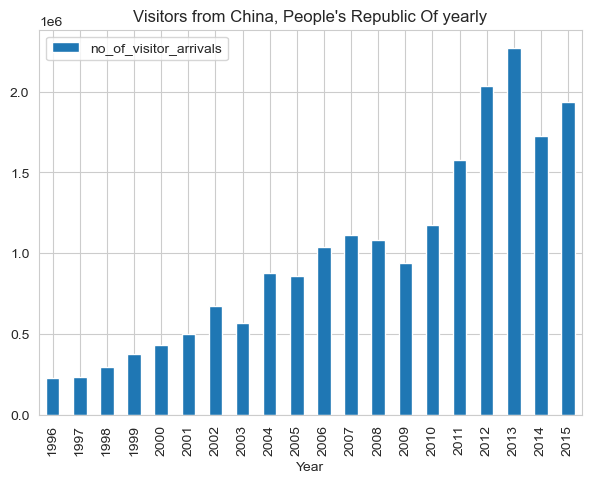

In [117]:
dfchina.groupby('year').sum().plot(kind='bar',y='no_of_visitor_arrivals',figsize=(7,5))
plt.title("Visitors from China, People's Republic Of yearly")
plt.xlabel("Year")

Text(0.5, 0, 'month')

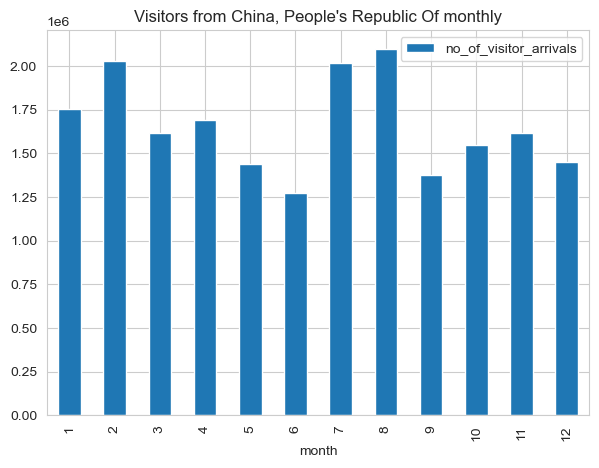

In [118]:
dfchina.groupby('month').sum().plot(kind='bar',y='no_of_visitor_arrivals',figsize=(7,5))
plt.title("Visitors from China, People's Republic Of monthly")
plt.xlabel("month")

Text(0.5, 0, 'month')

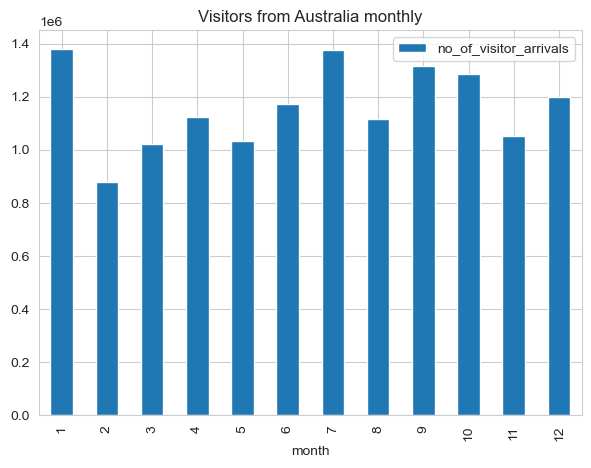

In [119]:
df_Australia.groupby('month').sum().plot(kind='bar',y='no_of_visitor_arrivals',figsize=(7,5))
plt.title("Visitors from Australia monthly")
plt.xlabel("month")

Text(0.5, 0, 'month')

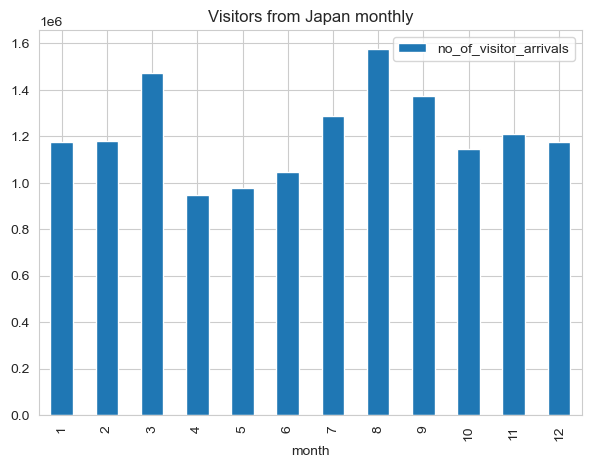

In [120]:
df_Japan.groupby('month').sum().plot(kind='bar',y='no_of_visitor_arrivals',figsize=(7,5))
plt.title("Visitors from Japan monthly")
plt.xlabel("month")

In [121]:
df6_sort= df6.sort_values(by='no_of_visitor_arrivals')

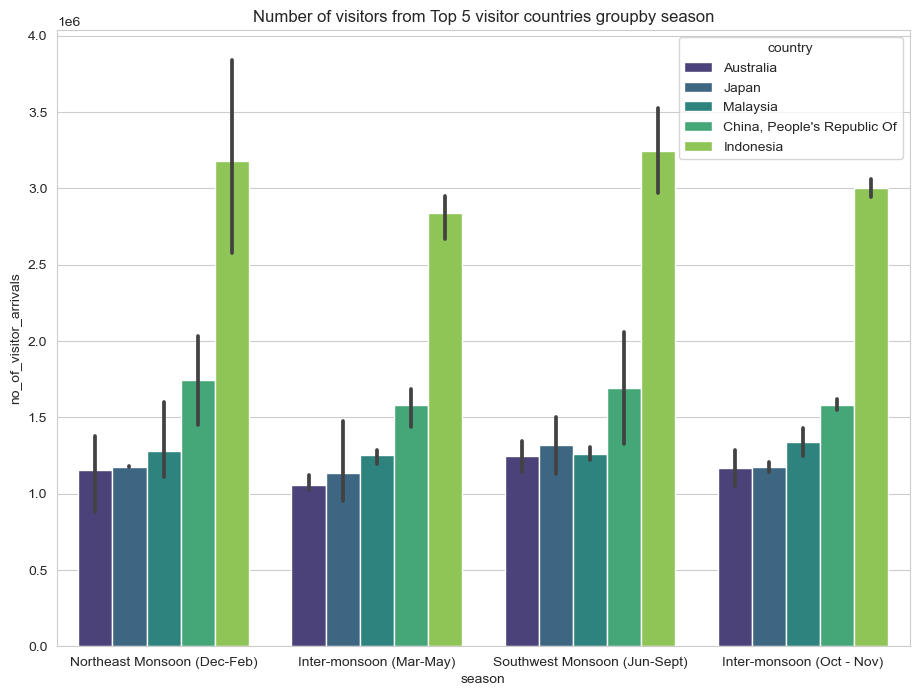

<Figure size 800x800 with 0 Axes>

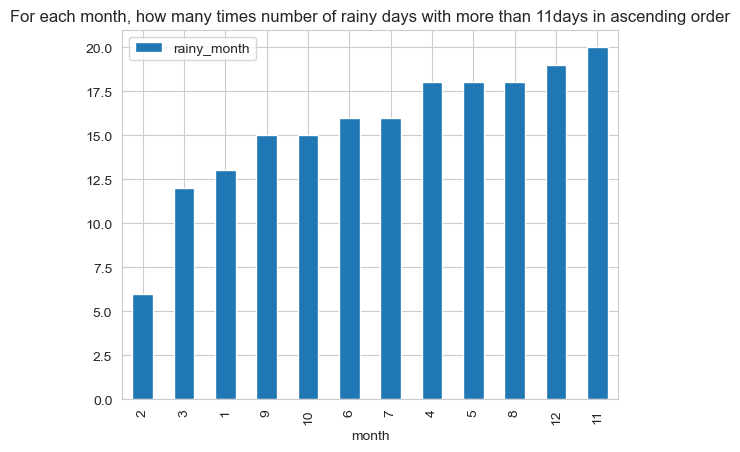

In [122]:
plt.figure(figsize=(11,8))
sns.barplot(x="season", y="no_of_visitor_arrivals", hue="country", data=df6_sort, palette='viridis')
plt.title('Number of visitors from Top 5 visitor countries groupby season')

plt.figure(figsize=(8,8))
(final_from1996.groupby(['month']).sum().sort_values(by='rainy_month').plot.bar(y = 'rainy_month') )
plt.title('For each month, how many times number of rainy days with more than 11days in ascending order')

plt.show()

<span style='color:Blue'>*Interpretation: Most number of visits happen during Northeast Monsoon (Dec-Feb) and Southwest Monsoon season (Jun-Sept).Throughout the seasons, Indonesians remain the highest visitors, followed by Chinese tourists.There are more Japanese and Australian visitors during Southwest Monsoon season (compared to their visits during the rest of the year)

<br>
<br>Lowest rainfall: December
<br>
<br>The highest visitors months are:
<br> August for Japan
<br> January for Australia
<br> August for China
<br> August for Japan
<br> December for Indonesia* </span>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

Our strategy is to curate the right strategic tourism events for the right visitors’ 
during the right period. 

We recommend the below activites:

Jun - Sept : Eat and Shop in Sunny Singapore
Guinness World Record for Longest Satay Line
Singapore Food Trails 
Great Singapore Sales 

Dec - Feb : An Event for Everyone
indoor Musical, circus and carnivals
Indoor snow experience with family
Christmas Wonderland at Gardens by the Bay
Party events


Potential enhancements

The current data set only shows visitors arrivals, and not spending
Not all visitors are big spenders
Spending gives a better idea on which country’s tourists are giving the most return 
To assign weightage to countries
based on proximity of their countries to Singapore


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!